In [13]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics


from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
import seaborn as sns


In [14]:
inputData = pd.read_excel(r'/Users/sunainarangarajan/Desktop/Volumetric_features.xlsx', engine='openpyxl')
inputData.head()

,S.No,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,...,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent.2,eTIV.1,Age,dataset
0,1,22916.9,982.7,15196.7,55796.4,6855.5,2956.4,4240.7,2223.9,2034.4,...,2.408,2.629,3.519,2.009,2.825,2.33635,1093846,1619602.965,85,1
1,2,22953.2,984.5,15289.7,55778.6,6835.1,3064.2,4498.6,2354.1,1927.1,...,2.417,2.640,3.488,2.111,2.720,2.34202,1099876,1624755.130,85,1
2,3,23320.4,1062.1,15382.1,55551.2,7566.0,3231.7,4456.2,1995.4,2064.7,...,2.374,2.601,3.342,2.146,2.684,2.31982,1097999,1622609.518,86,1
3,4,24360.0,1000.5,14805.4,54041.8,8004.6,3137.3,4262.2,1983.4,2017.7,...,2.366,2.639,3.361,2.056,2.700,2.29215,1070117,1583854.236,87,1
4,5,25769.4,1124.4,16331.1,54108.6,6677.4,2964.4,4204.6,2409.7,2251.8,...,2.381,2.555,3.450,2.052,2.574,2.30397,1075926,1617375.362,89,1


In [15]:
# brain volume is vector (X) and the output age vector (y)
X = inputData.drop(columns=['S.No', 'Age', 'dataset'])
y = inputData['Age']

# split the X and y vectors into training and testing dataset (80%/20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=6)


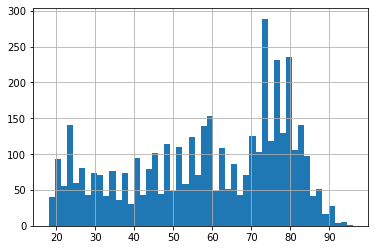

In [16]:
hist = y.hist(bins=50)

In [17]:
from sklearn.linear_model import Ridge

# instantiate a linear regression model 
rid = Ridge(alpha=0.5)

# fit the model 
rid.fit(X_train, y_train)

Ridge(alpha=0.5)

In [18]:
# check the model's performance on test data
prediction1 = rid.predict(X_test)

# compare the predictions to the known values (y_test)
print('r square value:', metrics.r2_score(y_test, prediction1))
print('mean absolute error (years):', metrics.mean_absolute_error(y_test, prediction1))
print('mean square error:', metrics.mean_squared_error(y_test, prediction1))
print('root mean square error (years):', np.sqrt(metrics.mean_squared_error(y_test, prediction1)))
print('Explained Variance:',metrics.explained_variance_score(y_test, prediction1))


r square value: 0.8596440117792776
mean absolute error (years): 6.033063813195767
mean square error: 57.43926209866968
root mean sqaure error (years): 7.578869447263865
Explained Variance: 0.8600721956338221


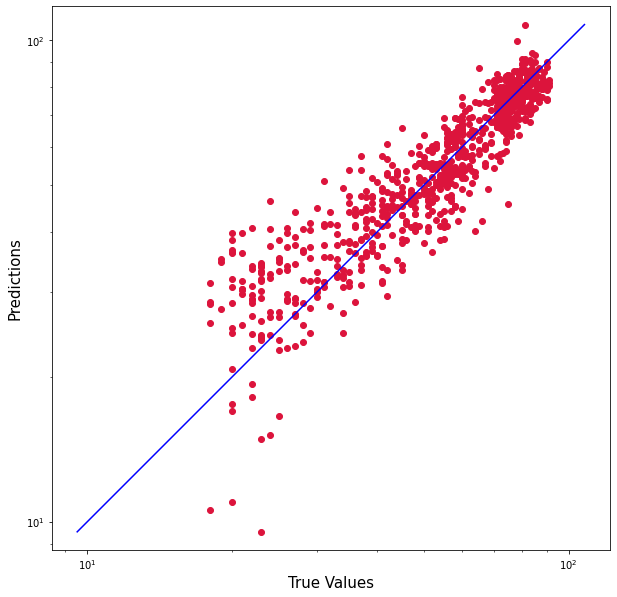

In [19]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, prediction1, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(prediction1), max(y_test))
p2 = min(min(prediction1), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [20]:
from catboost import CatBoostRegressor

# instantiate a linear regression model 
linreg = CatBoostRegressor()

# fit the model 
linreg.fit(X_train, y_train)




Learning rate set to 0.04963
0:	learn: 19.3627119	total: 18.6ms	remaining: 18.5s
1:	learn: 18.7319149	total: 25.8ms	remaining: 12.9s
2:	learn: 18.1179901	total: 32.5ms	remaining: 10.8s
3:	learn: 17.5230454	total: 38.5ms	remaining: 9.59s
4:	learn: 16.9442725	total: 44.5ms	remaining: 8.85s
5:	learn: 16.4250730	total: 50.4ms	remaining: 8.34s
6:	learn: 15.9089577	total: 55.8ms	remaining: 7.91s
7:	learn: 15.4505757	total: 61.5ms	remaining: 7.63s
8:	learn: 14.9918504	total: 67.2ms	remaining: 7.4s
9:	learn: 14.5650204	total: 72.8ms	remaining: 7.21s
10:	learn: 14.1809535	total: 79.7ms	remaining: 7.16s
11:	learn: 13.7809089	total: 85.4ms	remaining: 7.03s
12:	learn: 13.4264849	total: 91.5ms	remaining: 6.95s
13:	learn: 13.0720496	total: 97.1ms	remaining: 6.84s
14:	learn: 12.7441150	total: 103ms	remaining: 6.74s
15:	learn: 12.4365882	total: 109ms	remaining: 6.72s
16:	learn: 12.1490050	total: 115ms	remaining: 6.62s
17:	learn: 11.8823522	total: 120ms	remaining: 6.54s
18:	learn: 11.6361973	total: 125

174:	learn: 5.9111315	total: 995ms	remaining: 4.69s
175:	learn: 5.9021038	total: 1s	remaining: 4.69s
176:	learn: 5.8911210	total: 1.01s	remaining: 4.68s
177:	learn: 5.8765296	total: 1.01s	remaining: 4.68s
178:	learn: 5.8654116	total: 1.02s	remaining: 4.67s
179:	learn: 5.8535588	total: 1.02s	remaining: 4.67s
180:	learn: 5.8435968	total: 1.03s	remaining: 4.66s
181:	learn: 5.8318314	total: 1.03s	remaining: 4.65s
182:	learn: 5.8216966	total: 1.04s	remaining: 4.65s
183:	learn: 5.8116741	total: 1.05s	remaining: 4.64s
184:	learn: 5.8008166	total: 1.05s	remaining: 4.63s
185:	learn: 5.7896126	total: 1.06s	remaining: 4.63s
186:	learn: 5.7788538	total: 1.06s	remaining: 4.62s
187:	learn: 5.7674380	total: 1.07s	remaining: 4.61s
188:	learn: 5.7575709	total: 1.07s	remaining: 4.61s
189:	learn: 5.7496620	total: 1.08s	remaining: 4.6s
190:	learn: 5.7352015	total: 1.08s	remaining: 4.59s
191:	learn: 5.7255518	total: 1.09s	remaining: 4.59s
192:	learn: 5.7163883	total: 1.1s	remaining: 4.58s
193:	learn: 5.706

347:	learn: 4.3574006	total: 1.99s	remaining: 3.74s
348:	learn: 4.3484465	total: 2s	remaining: 3.73s
349:	learn: 4.3406730	total: 2.01s	remaining: 3.73s
350:	learn: 4.3330270	total: 2.01s	remaining: 3.72s
351:	learn: 4.3247224	total: 2.02s	remaining: 3.71s
352:	learn: 4.3142900	total: 2.02s	remaining: 3.71s
353:	learn: 4.3073984	total: 2.03s	remaining: 3.7s
354:	learn: 4.3018969	total: 2.03s	remaining: 3.7s
355:	learn: 4.2932687	total: 2.04s	remaining: 3.69s
356:	learn: 4.2868710	total: 2.04s	remaining: 3.68s
357:	learn: 4.2806233	total: 2.05s	remaining: 3.68s
358:	learn: 4.2744582	total: 2.06s	remaining: 3.67s
359:	learn: 4.2675835	total: 2.06s	remaining: 3.67s
360:	learn: 4.2622072	total: 2.07s	remaining: 3.66s
361:	learn: 4.2543098	total: 2.07s	remaining: 3.65s
362:	learn: 4.2478341	total: 2.08s	remaining: 3.65s
363:	learn: 4.2418037	total: 2.08s	remaining: 3.64s
364:	learn: 4.2356099	total: 2.09s	remaining: 3.63s
365:	learn: 4.2275338	total: 2.1s	remaining: 3.63s
366:	learn: 4.2223

526:	learn: 3.3261355	total: 2.99s	remaining: 2.69s
527:	learn: 3.3197722	total: 3s	remaining: 2.68s
528:	learn: 3.3151401	total: 3s	remaining: 2.67s
529:	learn: 3.3109324	total: 3.01s	remaining: 2.67s
530:	learn: 3.3038019	total: 3.02s	remaining: 2.66s
531:	learn: 3.3006965	total: 3.02s	remaining: 2.66s
532:	learn: 3.2955729	total: 3.03s	remaining: 2.65s
533:	learn: 3.2907865	total: 3.03s	remaining: 2.65s
534:	learn: 3.2875428	total: 3.04s	remaining: 2.64s
535:	learn: 3.2834030	total: 3.04s	remaining: 2.63s
536:	learn: 3.2804152	total: 3.05s	remaining: 2.63s
537:	learn: 3.2754300	total: 3.06s	remaining: 2.62s
538:	learn: 3.2701970	total: 3.06s	remaining: 2.62s
539:	learn: 3.2652074	total: 3.07s	remaining: 2.61s
540:	learn: 3.2606239	total: 3.07s	remaining: 2.61s
541:	learn: 3.2575151	total: 3.08s	remaining: 2.6s
542:	learn: 3.2547647	total: 3.08s	remaining: 2.6s
543:	learn: 3.2505933	total: 3.09s	remaining: 2.59s
544:	learn: 3.2471512	total: 3.09s	remaining: 2.58s
545:	learn: 3.241724

698:	learn: 2.6439073	total: 3.99s	remaining: 1.72s
699:	learn: 2.6405436	total: 4s	remaining: 1.71s
700:	learn: 2.6374339	total: 4s	remaining: 1.71s
701:	learn: 2.6338735	total: 4.01s	remaining: 1.7s
702:	learn: 2.6317063	total: 4.02s	remaining: 1.7s
703:	learn: 2.6298877	total: 4.02s	remaining: 1.69s
704:	learn: 2.6258694	total: 4.03s	remaining: 1.69s
705:	learn: 2.6225564	total: 4.04s	remaining: 1.68s
706:	learn: 2.6180683	total: 4.04s	remaining: 1.67s
707:	learn: 2.6138211	total: 4.05s	remaining: 1.67s
708:	learn: 2.6112787	total: 4.05s	remaining: 1.66s
709:	learn: 2.6074092	total: 4.06s	remaining: 1.66s
710:	learn: 2.6047723	total: 4.06s	remaining: 1.65s
711:	learn: 2.6020751	total: 4.07s	remaining: 1.65s
712:	learn: 2.5988591	total: 4.07s	remaining: 1.64s
713:	learn: 2.5954718	total: 4.08s	remaining: 1.63s
714:	learn: 2.5921453	total: 4.08s	remaining: 1.63s
715:	learn: 2.5881206	total: 4.09s	remaining: 1.62s
716:	learn: 2.5857568	total: 4.1s	remaining: 1.62s
717:	learn: 2.5829913

874:	learn: 2.1550648	total: 4.98s	remaining: 712ms
875:	learn: 2.1530793	total: 4.99s	remaining: 706ms
876:	learn: 2.1501916	total: 4.99s	remaining: 701ms
877:	learn: 2.1481348	total: 5s	remaining: 695ms
878:	learn: 2.1452164	total: 5.01s	remaining: 689ms
879:	learn: 2.1422211	total: 5.01s	remaining: 683ms
880:	learn: 2.1399269	total: 5.02s	remaining: 678ms
881:	learn: 2.1355183	total: 5.02s	remaining: 672ms
882:	learn: 2.1338311	total: 5.03s	remaining: 666ms
883:	learn: 2.1317497	total: 5.03s	remaining: 661ms
884:	learn: 2.1299002	total: 5.04s	remaining: 655ms
885:	learn: 2.1272784	total: 5.04s	remaining: 649ms
886:	learn: 2.1250997	total: 5.05s	remaining: 643ms
887:	learn: 2.1229209	total: 5.06s	remaining: 638ms
888:	learn: 2.1205809	total: 5.06s	remaining: 632ms
889:	learn: 2.1182981	total: 5.07s	remaining: 626ms
890:	learn: 2.1161099	total: 5.07s	remaining: 621ms
891:	learn: 2.1128575	total: 5.08s	remaining: 615ms
892:	learn: 2.1111693	total: 5.08s	remaining: 609ms
893:	learn: 2.1

In [21]:
# check the model's performance on test data
prediction2 = linreg.predict(X_test)


# compare the predictions to the known values (y_test)
print('r square value:', metrics.r2_score(y_test, prediction2))
print('mean absolute error (years):', metrics.mean_absolute_error(y_test, prediction2))
print('mean square error:', metrics.mean_squared_error(y_test, prediction2))
print('root mean square error (years):', np.sqrt(metrics.mean_squared_error(y_test, prediction2)))
print('Explained Variance:',metrics.explained_variance_score(y_test, prediction2))

r square value: 0.893462988605658
mean absolute error (years): 4.851838876293574
mean square error: 43.599189448655736
root mean square error (years): 6.60296823017162
Explained Variance: 0.893909131872089


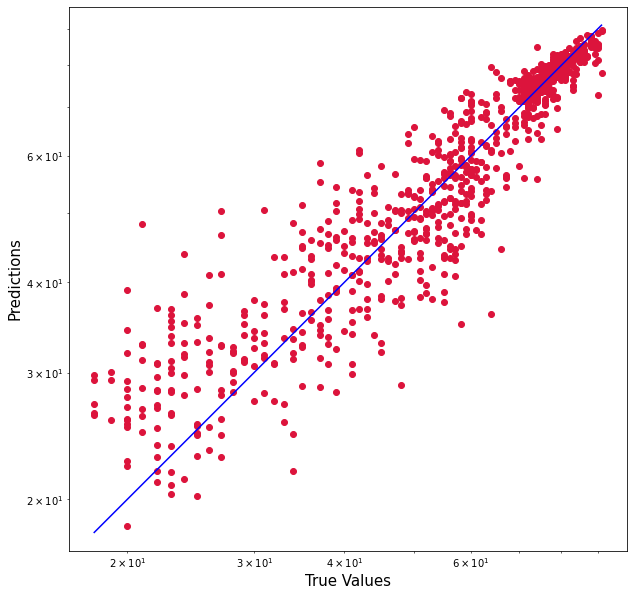

In [22]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, prediction2, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(prediction2), max(y_test))
p2 = min(min(prediction2), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [23]:
from sklearn.linear_model import BayesianRidge

bayrid = BayesianRidge()


# fit model to training data
bayrid.fit(X_train, y_train)

BayesianRidge()

In [24]:
# check the model's performance on test data
prediction3 = bayrid.predict(X_test)

# compare the predictions to the known values (y_test)
print('r square value:', metrics.r2_score(y_test, prediction3))
print('mean absolute error (years):', metrics.mean_absolute_error(y_test, prediction3))
print('mean square error:', metrics.mean_squared_error(y_test, prediction3))
print('root mean sqaure error (years):', np.sqrt(metrics.mean_squared_error(y_test, prediction3)))
print('Explained Variance:',metrics.explained_variance_score(y_test, prediction3))

r square value: 0.8598347585345392
mean absolute error (years): 6.009349077179323
mean square error: 57.36120092715263
root mean sqaure error (years): 7.573717774458765
Explained Variance: 0.8601419042926258


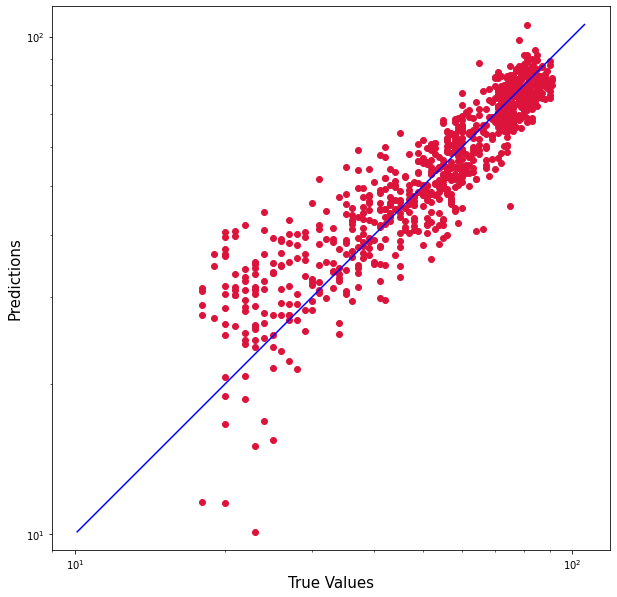

In [27]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, prediction3, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(prediction3), max(y_test))
p2 = min(min(prediction3), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()